<a href="https://colab.research.google.com/github/ShauryaCodes2004/UPI_fraud_detection/blob/main/main_upi_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
!pip install pandas
!pip install numpy

In [20]:
!pip install pyforest

In [21]:
import pandas as pd

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as px
import pyforest

In [23]:
# data collection and data manipulation
df = pd.read_csv("/content/Copy of Sample_DATA.csv")

In [24]:
df.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20/04/23,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08/08/23,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25/06/23,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28/01/24,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21/06/23,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [25]:
#importing date and time module in python
import datetime as dt

In [26]:
df["Date"]=pd.to_datetime(df["Date"],format= "%d/%m/%y")

In [27]:
df["Year"]=df["Date"].dt.year

In [28]:
df["Month"]= df["Date"].dt.month

In [29]:
df["Month"].unique()

#sort the array
df["Month"].sort_values(ascending=True).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [30]:
months = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

In [31]:
df["Month"].sort_values(ascending=True).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [32]:
df["Month"].map(months)

,Month
0,April
1,August
2,June
3,January
4,June
...,...
642,July
643,July
644,April
645,October


In [33]:
df["Month"]=df["Month"].map(months)

In [34]:
df

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,...,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,T00022452,2023-04-20,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,...,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,April
1,T00032233,2023-08-08,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,...,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,August
2,T00037364,2023-06-25,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,...,Android,2,Utilities,Online,44.19,22,106.69,1,2023,June
3,T00015924,2024-01-28,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,...,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,January
4,T00021805,2023-06-21,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,...,MacOS,1,Other,Online,12.38,25,374.89,1,2023,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,T00026082,2023-07-24,3:12:04 AM,6696dc2b-d48e-4880-8845-e65aa1df8d7d,4ab8bcd6-295c-4ae5-b4f5-2f3182a969c8,a1f5d01e-a69f-404d-b2ce-6ff4bb17de62,Bill Payment,Gamma Bank,Hyderabad,Assam,...,iOS,4,Travel bookings,In-store,14.00,25,28.27,0,2023,July
643,T00017272,2023-07-05,6:21:18 AM,f2af26ef-0e08-42f8-b6ed-eaab786f5bf6,6cd4af1c-6564-47eb-bcf9-cd44c45c0f2b,36d089dd-b74d-4157-ba29-823b85368169,Purchase,Other,Bangalore,Tripura,...,Windows,10,More Services,Mobile,-33.38,28,26.26,0,2023,July
644,T00048923,2023-04-16,8:32:41 AM,c6ce37eb-332d-4e4f-995f-fba48d4dedb9,690bd64f-5c83-41b8-873a-57c9bc6bb132,668b172d-b1ab-438b-9650-358bc8d48494,Bill Payment,Other,Mumbai,Arunachal Pradesh,...,Android,1,More Services,Online,-44.37,19,6.02,0,2023,April
645,T00022497,2023-10-28,9:33:42 AM,b8ac3703-52dc-4372-b59b-4f9b51a5a855,48b40bc8-a730-4420-9702-2beecca286f0,e18b7076-1718-475e-81de-9ff2c392d194,Bank Transfer,Bank of Data,Vijayawada,Madhya Pradesh,...,Windows,2,Investment,In-store,-57.29,12,17.12,0,2023,October


In [35]:
df.drop(['Date'],axis=1,inplace=True)

In [36]:
df

,Transaction_ID,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,...,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,T00022452,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,...,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,April
1,T00032233,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,...,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,August
2,T00037364,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,...,Android,2,Utilities,Online,44.19,22,106.69,1,2023,June
3,T00015924,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,...,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,January
4,T00021805,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,...,MacOS,1,Other,Online,12.38,25,374.89,1,2023,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,T00026082,3:12:04 AM,6696dc2b-d48e-4880-8845-e65aa1df8d7d,4ab8bcd6-295c-4ae5-b4f5-2f3182a969c8,a1f5d01e-a69f-404d-b2ce-6ff4bb17de62,Bill Payment,Gamma Bank,Hyderabad,Assam,34.163.43.64,...,iOS,4,Travel bookings,In-store,14.00,25,28.27,0,2023,July
643,T00017272,6:21:18 AM,f2af26ef-0e08-42f8-b6ed-eaab786f5bf6,6cd4af1c-6564-47eb-bcf9-cd44c45c0f2b,36d089dd-b74d-4157-ba29-823b85368169,Purchase,Other,Bangalore,Tripura,129.125.172.104,...,Windows,10,More Services,Mobile,-33.38,28,26.26,0,2023,July
644,T00048923,8:32:41 AM,c6ce37eb-332d-4e4f-995f-fba48d4dedb9,690bd64f-5c83-41b8-873a-57c9bc6bb132,668b172d-b1ab-438b-9650-358bc8d48494,Bill Payment,Other,Mumbai,Arunachal Pradesh,27.48.57.181,...,Android,1,More Services,Online,-44.37,19,6.02,0,2023,April
645,T00022497,9:33:42 AM,b8ac3703-52dc-4372-b59b-4f9b51a5a855,48b40bc8-a730-4420-9702-2beecca286f0,e18b7076-1718-475e-81de-9ff2c392d194,Bank Transfer,Bank of Data,Vijayawada,Madhya Pradesh,206.122.250.79,...,Windows,2,Investment,In-store,-57.29,12,17.12,0,2023,October


In [37]:
df.columns

Index(['Transaction_ID', 'Time', 'Merchant_ID', 'Customer_ID', 'Device_ID',
       'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud', 'Year', 'Month'],
      dtype='object')

In [38]:
df.drop(['Time'],axis=1, inplace=True)

In [39]:
df

,Transaction_ID,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,T00022452,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,April
1,T00032233,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,August
2,T00037364,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1,2023,June
3,T00015924,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,January
4,T00021805,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1,2023,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642,T00026082,6696dc2b-d48e-4880-8845-e65aa1df8d7d,4ab8bcd6-295c-4ae5-b4f5-2f3182a969c8,a1f5d01e-a69f-404d-b2ce-6ff4bb17de62,Bill Payment,Gamma Bank,Hyderabad,Assam,34.163.43.64,Pending,iOS,4,Travel bookings,In-store,14.00,25,28.27,0,2023,July
643,T00017272,f2af26ef-0e08-42f8-b6ed-eaab786f5bf6,6cd4af1c-6564-47eb-bcf9-cd44c45c0f2b,36d089dd-b74d-4157-ba29-823b85368169,Purchase,Other,Bangalore,Tripura,129.125.172.104,Pending,Windows,10,More Services,Mobile,-33.38,28,26.26,0,2023,July
644,T00048923,c6ce37eb-332d-4e4f-995f-fba48d4dedb9,690bd64f-5c83-41b8-873a-57c9bc6bb132,668b172d-b1ab-438b-9650-358bc8d48494,Bill Payment,Other,Mumbai,Arunachal Pradesh,27.48.57.181,Failed,Android,1,More Services,Online,-44.37,19,6.02,0,2023,April
645,T00022497,b8ac3703-52dc-4372-b59b-4f9b51a5a855,48b40bc8-a730-4420-9702-2beecca286f0,e18b7076-1718-475e-81de-9ff2c392d194,Bank Transfer,Bank of Data,Vijayawada,Madhya Pradesh,206.122.250.79,Failed,Windows,2,Investment,In-store,-57.29,12,17.12,0,2023,October


In [40]:
df.columns

Index(['Transaction_ID', 'Merchant_ID', 'Customer_ID', 'Device_ID',
       'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud', 'Year', 'Month'],
      dtype='object')

#

In [45]:
df["fraud"].value_counts(normalize = True)*100

,proportion
fraud,
0,76.043277
1,23.956723


<Axes: xlabel='fraud', ylabel='count'>

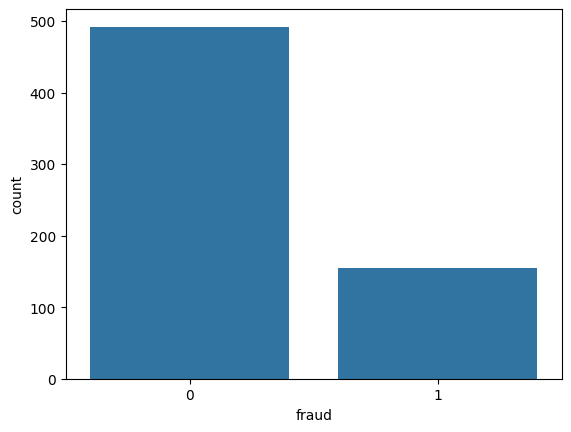

In [46]:
sns.countplot(data=df,x="fraud")